## WHAT

### 正規性の検定とは
ある分布が正規分布に従っているかどうかを調べる検定を指します。

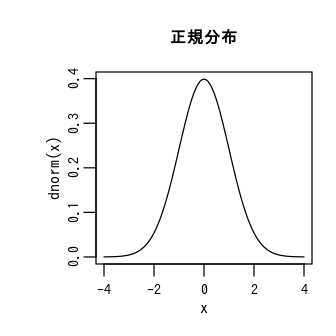

In [185]:
options(repr.plot.width=2.8, repr.plot.height=2.8) # 描画領域の指定
par(family = "IPAGothic") # 日本語を使うためのオプション
par(mar = c(3, 4, 3, 1)) #  余白を何行分とるか指定．下，左，上，右の順． 初期状態では 5.1, 4.1, 4.1, 2.1
par(mgp = c(1.3, 0.5, 0))  #  ラベル文字， 軸の数字、軸の位置を何行分ずらすかを指定． 初期状態は c(3, 1, 0) 


curve(dnorm,-4,4, main = "正規分布", cex.main = 0.8,  cex.lab  = 0.8, cex.axis = 0.7) 

今回は以下の方法で、データが正規性を持つか確認します。

- ヒストグラムやqqプロットを用いて視覚的に確認する
- シャピロ-ウィルクの正規性の検定
- コルモゴロフ-スミルノフ検定

#### 正規分布とは

> 世の中の多くの分布が正規分布であるということを示すために決定的に重要な前提が「世の中で起こることはすべてが確率の問題である」という思想である。  (中略)  
> この世に対するこのような前提があるから、統計という学問は、確率論から始まるのである。

[なぜ世の中の分布の多くは正規分布に従うのか](https://tomsekiguchi.hatenablog.com/entry/20160410/1460311315)

> 正規分布は統計学を理解する上で、非常に大事な分布ですが、その大きな理由がこの特徴(**中心極限定理**)と言います。  
> 抽出元の母集団の分布がどのような分布に従っていても、nが大きければ、その標本平均の分布は正規分布に従うのです。  
> 二項分布だろうと、ポアソン分布だろうと、指数分布だろうと、あるいは未知の分布だろうと、その標本平均の分布は正規分布に従います。（n→∞ならば完全に従う）

> **中心極限定理**  
> 母平均 $μ$ ,母分散 $σ^{2}$ の母集団から大きさ $n$ の標本を無作為に抽出するとき、  
> 標本平均 $\overline{X}$ は, $n$ が大きい場合 $N(μ,\frac{σ^{2}}{n})$ に近似的に従う。

[正規分布のわかりやすいまとめ](https://to-kei.net/distribution/normal-distribution/#i-4)

<br><br>

<div style="float:left;">
    <img src="https://atarimae.biz/wp-content/uploads/2017/06/dice2-177.png"/ width=250>
</div>
<div style="float:left;">
    <img src="https://atarimae.biz/wp-content/uploads/2017/06/dice3-177.png"/ width=250>
</div>
<div style="float:left;">
    <img src="https://atarimae.biz/wp-content/uploads/2017/06/dice10-177.png"/ width=250>
</div>
<br clear="both"/>  

[中心極限定理の意味](https://atarimae.biz/archives/17470)  
<br>

イメージして欲しいのは、ある同一の分布からデータをたくさん集めると、<br>
**元の分布がどのような分布であれ、nが増えるほど正規分布に近づくよ**、という事です。<br>
(詳しい解説はまた今度あるかもしれません)  

#### 検定とは
データが望んだ性質を持っているかどうかを、**確率をもとに判断**する手法です。具体的には、以下の手順で行われます。  

##### 帰無仮説の設定
支持したい対立仮説に対して、帰無仮説と呼ばれる、否定したい仮説を設定します。    
##### 統計量Tの計算
調べたいデータの統計量を計算します。  
##### 統計量Tと棄却域の比較による帰無仮説の採用または棄却
帰無仮説が正しいとした仮定とき、観測した事象よりも極端なことが起こる確率(=p値)を求めます。  
その後、事前に設定しておいた有意水準$ P(reject | H_{0})  (=0.05な事が多い) $ と比較して下回っていれば、  
帰無仮説が棄却され、対立仮説が支持されます。  
なお、**p値が有意水準以上だと、帰無仮説が棄却されないだけで、帰無仮説が正しいとは主張できません。**

[パラメトリックとノンパラメトリック(統計検定の手法)](https://data-science.gr.jp/theory/tbs_parametric.html)

## WHY
正規性の検定は大きく２つの目的で実施されます。

### データをきちんと収集できたか確かめる
上記の正規分布のところで述べた通り、データをきちんと（≒偏りなく）集められたら、それは正規分布に近づきます（特にnが大きくなるほど）。  
一方、偏った収集を行うと正規分布に近づかないかもしれません。  
そのため、データをきちんと集められたかを調べる目的で正規性の検定を行うことがあります。  
<br>

### 正規性を仮定した統計検定の手法(=正規性を仮定したパラメトリックな手法)を適用できるか調べる
統計検定にはパラメトリックな手法とノンパラメトリックな手法が存在します。  
パラメトリックな手法とは、データが「ある分布」であることを仮定した上で仮説を検証する手法です。  
特に、**普通の**データなら基本的に備わっているであろう**正規分布**であることを仮定した手法が非常に多く存在します。  
そのため、これらの検定を実施したい時は、データが正規分布であるか調べなければなりません。  
<br>

<u>**注意**</u>  
A. 例えば、データがたくさん集められていない場合は正しく計測できていても正規分布になっているとは限りません。  
B. 群間の比較をする時に正規性を仮定した検定にパラメトリックな手法を用いる場合、<u>**全ての群が正規分布でないと使えません。**</u>

## HOW

今回は、データの正規性を確認する方法として、以下の2つを紹介します。  

- **視覚的に確認する方法**
- **統計的な検定**

[正規性の確認](https://bellcurve.jp/statistics/course/12931.html)  

その前に、元となるデータを生成してみましょう。  

### データ生成

今回は正規分布、連続一様分布、ガンマ分布およびベータ分布を用意します。[データ解析その前に: 分布型の確認と正規性の検定 #rstatsj](https://qiita.com/uri/items/e656f90e9dda342c54bb)

In [186]:
df.normal <-  data.frame(x = rnorm(n = 1000, mean = 0, sd = 1)) # 正規分布（平均０、分散１）に従うランダムなデータ
df.uniform <- data.frame(x = runif(n = 1000, min = 0, max = 1)) # 一様分布に従うランダムな200個の観測値データ
df.gamma <-   data.frame(x = rgamma(n = 1000, shape = 1, rate = 1)) # ガンマ分布
df.beta <-    data.frame(x = rbeta(n = 1000, shape1 = 2, shape2 = 5)) # ベータ分布

In [187]:
# データの定義
name_list <- c("正規分布", "一様分布", "γ分布", "β分布")
df_list <- c(df.normal, df.uniform, df.gamma, df.beta)

Rの確率分布と乱数に関する関数の使い方   [確率分布と乱数](http://cse.naro.affrc.go.jp/takezawa/r-tips/r/60.html)

### 視覚的に確認する方法

グラフを描画することで、正規分布に近いかどうかまずは感覚的に見ていきます。

#### ヒストグラム
まずはヒストグラムからどのような形のデータか確認しましょう。

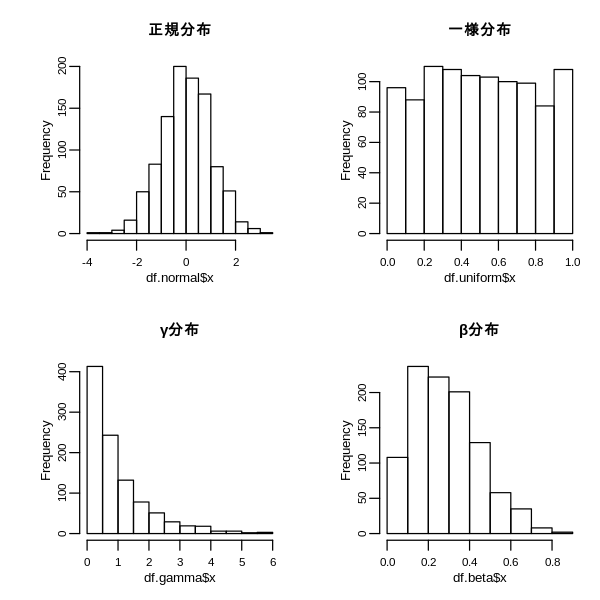

In [188]:
options(repr.plot.width=5, repr.plot.height=5) # 描画領域の指定
par(mfrow=c(2,2))  # 画面を n * m 分割
par(mar = c(3, 4, 3, 1)) #  余白を何行分とるか指定．下，左，上，右の順． 初期状態では 5.1, 4.1, 4.1, 2.1
par(mgp = c(1.3, 0.5, 0))  #  ラベル文字， 軸の数字、軸の位置を何行分ずらすかを指定． 初期状態は c(3, 1, 0) 

hist(df.normal$x, main = "正規分布",  cex.main = 0.9,  cex.lab  = 0.8, cex.axis = 0.7)
hist(df.uniform$x, main = "一様分布",  cex.main = 0.9,  cex.lab  = 0.8, cex.axis = 0.7)
hist(df.gamma$x, main = "γ分布",  cex.main = 0.9,  cex.lab  = 0.8, cex.axis = 0.7)
hist(df.beta$x, main = "β分布",  cex.main = 0.9,  cex.lab  = 0.8, cex.axis = 0.7)

正規分布からサンプリングしたグラフは正規分布になりますね。  
次に、Q-Qプロットと呼ばれる方法を用いて可視化してみます。

#### Q-Qプロット

> QQプロットとは、X軸上に観測した累積パーセント、Y軸上に期待累積パーセントを持つグラフのことです。  
> ヒストグラムよりなじみは薄いと思うので、わからなければ 一直線上になっていれば正規分布であるくらいに覚えておけばOKです。  
> <br>
> [正規分布かどうかを見極める3つのステップ（Pythonでの検定実践あり）](http://www.ie-kau.net/entry/2016/03/10/%E6%AD%A3%E8%A6%8F%E5%88%86%E5%B8%83%E3%81%8B%E3%81%A9%E3%81%86%E3%81%8B%E3%82%92%E8%A6%8B%E6%A5%B5%E3%82%81%E3%82%8B3%E3%81%A4%E3%81%AE%E3%82%B9%E3%83%86%E3%83%83%E3%83%97%EF%BC%88Python%EF%BC%89)  

図解：[【統計学】Q-Qプロットの仕組みをアニメーションで理解する。](https://qiita.com/kenmatsu4/items/59605dc745707e8701e0)  
<br>
ヒストグラムから計算される累積分布関数と調べたい分布(今回は理想的な正規分布)の累積分布関数の対応をプロットしたものになります。  
Q-Qプロットが直線になれば、対象のデータは調べたい分布と同じ形状だと考えられます。  
ということで、実際に4つのデータのQ-Qプロットを描いてみましょう。  
参考：[正規性の検定](http://cse.naro.affrc.go.jp/takezawa/r-tips/r/63.html)  

In [189]:
# 累積分布関数を描いて見る
Fn.normal <- ecdf(df.normal$x)
Fn.uniform <- ecdf(df.uniform$x)
Fn.gamma <- ecdf(df.gamma$x)
Fn.beta <- ecdf(df.beta$x)

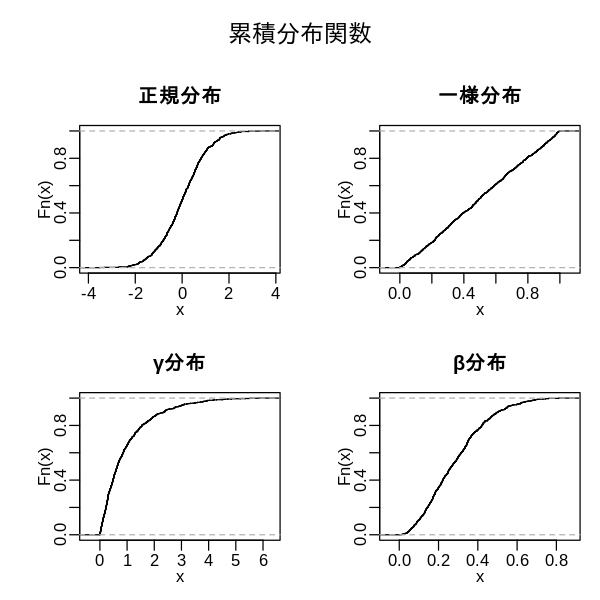

In [190]:
par(oma = c(0, 0, 3.3, 0))   # 下・左・上・右の順で余白を設定
par(mfrow=c(2,2))  # 画面を n * m 分割
par(mar = c(3, 4, 3, 1)) #  余白を何行分とるか指定．下，左，上，右の順． 初期状態では 5.1, 4.1, 4.1, 2.1
par(mgp = c(1.3, 0.5, 0))  #  ラベル文字， 軸の数字、軸の位置を何行分ずらすかを指定． 初期状態は c(3, 1, 0) 

plot(Fn.normal, do.point=F, verticals=T, main="正規分布")   # 点を描かず，ジャンプ線（縦の線）を描く
plot(Fn.uniform, do.point=F, verticals=T, main="一様分布")   # 点を描かず，ジャンプ線（縦の線）を描く
plot(Fn.gamma, do.point=F, verticals=T, main="γ分布")   # 点を描かず，ジャンプ線（縦の線）を描く
plot(Fn.beta, do.point=F, verticals=T, main="β分布")   # 点を描かず，ジャンプ線（縦の線）を描く

mtext(side = 3, line=1, outer=T, text = "累積分布関数", cex=1.2) # 全体のタイトル

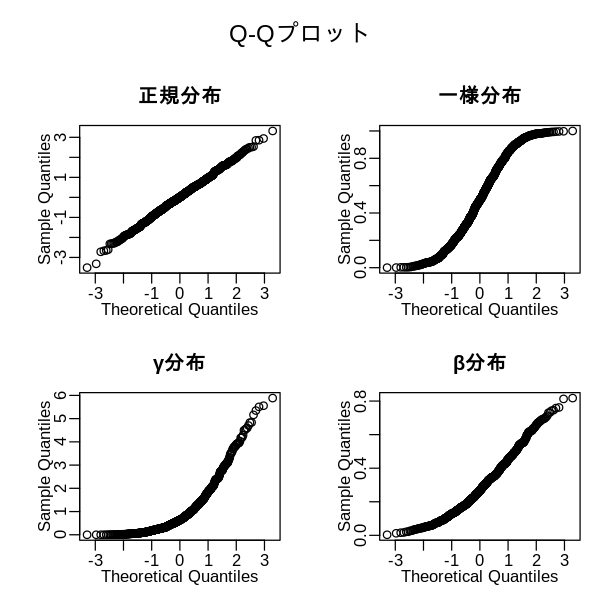

In [191]:
par(oma = c(0, 0, 3.3, 0))   # 下・左・上・右の順で余白を設定
par(mfrow=c(2,2))  # 画面を n * m 分割
par(mar = c(3, 4, 3, 1)) #  余白を何行分とるか指定．下，左，上，右の順． 初期状態では 5.1, 4.1, 4.1, 2.1
par(mgp = c(1.3, 0.5, 0))  #  ラベル文字， 軸の数字、軸の位置を何行分ずらすかを指定． 初期状態は c(3, 1, 0) 

qqnorm(df.normal$x, main="正規分布")   # 点を描かず，ジャンプ線（縦の線）を描く
qqnorm(df.uniform$x, main="一様分布")   # 点を描かず，ジャンプ線（縦の線）を描く
qqnorm(df.gamma$x, main="γ分布")   # 点を描かず，ジャンプ線（縦の線）を描く
qqnorm(df.beta$x, main="β分布")   # 点を描かず，ジャンプ線（縦の線）を描く

 mtext(side = 3, line=1, outer=T, text = "Q-Qプロット", cex=1.2) # 全体のタイトル

正規分布のQ-Qプロットは、綺麗な直線を描いていますね。  
一様分布、γ分布は明らかに直線ではないですが、 β分布は正規分布と一見してあまり違いが見えませんね。  
このように、グラフだけでは**「なんとなく正規分布っぽい」**ことしか分かりません。  

### 正規性の検定

では、次により違いを定量的に扱う検定について見ていきましょう。  
ここでは、代表的な手法を２つ紹介します。

#### シャピロ・ウィルク検定

> シャピロ・ウィルク検定はコルモゴロフ・スミルノフ検定等と同様に，  
> 得られたデータが正規分布に従うものか否かを調べる検定法である．  
> すなわち，**データが正規母集団に由来する**という帰無仮説を検定する．  
> [Rによるシャピロ・ウィルク検定](https://data-science.gr.jp/implementation/ist_r_shapiro_wilk_test.html)  

ここで、帰無仮説（データが正規母集団に由来する）が棄却されない≠データが正規母集団に由来するとはならない ？？  
では、実際に検定してみましょう。

シャピロ・ウィルク検定の結果、正規分布以外の３つは正規分布ではないという結果になりました。

In [192]:
sh.normal <- shapiro.test(x=df.normal$x)
sh.uniform <- shapiro.test(x=df.uniform$x)
sh.gamma <- shapiro.test(x=df.gamma$x)
sh.beta<- shapiro.test(x=df.beta$x)


p_list <- c(sh.normal$p.value, sh.uniform$p.value, sh.gamma$p.value, sh.beta$p.value)
bool_list <- c(sh.normal$p.value > 0.05, sh.uniform$p.value > 0.05, sh.gamma$p.value > 0.05, sh.beta$p.value > 0.05)

frame <-  data.frame(name=name_list, p_value=p_list, normal=bool_list)
frame

name,p_value,normal
正規分布,9.002146e-01,TRUE
一様分布,2.691040e-16,FALSE
γ分布,2.154254e-32,FALSE
β分布,2.742972e-14,FALSE


#### コルモゴロフ・スミルノフ検定

> コルモゴロフ-スミルノフ検定は２つの母集団の確率分布が異なるかどうかを調べるために用いられる。  
> データの分布型の位置と形が考慮されるため、比較対象に正規分布からなるデータを指定すれば、  
> 手持ちのデータが正規分布と等しいか異なるかがわかる。  
> 帰無仮説は「二つの分布が等しい」である。  
> [データ解析その前に: 分布型の確認と正規性の検定 #rstatsj](https://qiita.com/uri/items/e656f90e9dda342c54bb)

ここで、帰無仮説（二つの分布が等しい）が棄却されない≠データが正規母集団に由来するとはならない ？？  
では、実際に検定してみましょう。

In [193]:
ksd.normal <- ks.test(x=df.normal$x, y="pnorm", mean=mean(df.normal$x),sd=sd(df.normal$x)) 
ksd.uniform <-  ks.test(x=df.uniform$x, y="pnorm", mean=mean(df.uniform$x),sd=sd(df.uniform$x)) 
ksd.gamma <-  ks.test(x=df.gamma$x, y="pnorm", mean=mean(df.gamma$x),sd=sd(df.gamma$x)) 
ksd.beta<-  ks.test(x=df.beta$x, y="pnorm", mean=mean(df.beta$x),sd=sd(df.beta$x)) 

p_list <- c(ksd.normal$p.value, ksd.uniform$p.value, ksd.gamma$p.value, ksd.beta$p.value)
bool_list <- c(ksd.normal$p.value > 0.05, ksd.uniform$p.value > 0.05, ksd.gamma$p.value > 0.05, ksd.beta$p.value > 0.05)

frame <-  data.frame(name=name_list, p_value=p_list, normal=bool_list)
frame

name,p_value,normal
正規分布,0.7894533949,TRUE
一様分布,0.0021786049,FALSE
γ分布,0.0000000000,FALSE
β分布,0.0005848522,FALSE


シャピロ・ウィルク検定の結果、正規分布以外の３つは正規分布ではないという結果になりました。

## まとめ
今回は、

- 正規性の検定とは何か
- 何のために行うのか
- どうやって行うのか

について説明しました。  皆さんもぜひ使いこなしてください！！